# Load Raw Data and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling

In [29]:
H21RawData=pd.read_csv("../../data/raw/world-happiness-report-2021.csv")
H19RawData=pd.read_csv('../../data/raw/2019.csv')
H18RawData=pd.read_csv('../../data/raw/2018.csv')
H17RawData=pd.read_csv('../../data/raw/2017.csv')
H16RawData=pd.read_csv('../../data/raw/2016.csv')
H15RawData=pd.read_csv('../../data/raw/2015.csv')
LivCostRawData=pd.read_csv('../../data/raw/cost_of_living 2020.csv')
GDPRawData=pd.read_csv('../../data/raw/gdp.csv')
H20RawData=pd.read_csv('../../data/raw/world-happiness-report.csv')

# Rename Columns

In [3]:
H17RawData.rename(columns={'Happiness.Rank':'Happiness Rank',
                           'Happiness.Score':'Happiness Score',
                           'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                          'Trust..Government.Corruption.':'Trust (Government Corruption)'}, inplace=True)

In [4]:
H18RawData.rename(columns={'Overall rank':'Happiness Rank',
                           'Country or region':'Country',
                           'Score':'Happiness Score',
                           'GDP per capita':'Economy (GDP per Capita)',
                           'Freedom to make life choices':'Freedom',
                          'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)

In [5]:
H19RawData.rename(columns={'Overall rank':'Happiness Rank',
                           'Country or region':'Country',
                           'Score':'Happiness Score',
                           'GDP per capita':'Economy (GDP per Capita)',
                           'Freedom to make life choices':'Freedom',
                          'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)

# Clean Data

In [6]:
for val in H21RawData:
    print(val)

Country name
Regional indicator
Ladder score
Standard error of ladder score
upperwhisker
lowerwhisker
Logged GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption
Ladder score in Dystopia
Explained by: Log GDP per capita
Explained by: Social support
Explained by: Healthy life expectancy
Explained by: Freedom to make life choices
Explained by: Generosity
Explained by: Perceptions of corruption
Dystopia + residual


In [7]:
def select_col (df):
    df=df[['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Freedom','Trust (Government Corruption)','Generosity']]
    return (df)

In [8]:
df15=select_col(H15RawData)
df16=select_col(H16RawData)
df17=select_col(H17RawData)
df18=select_col(H18RawData)
df19=select_col(H19RawData)

In [47]:
year=['2015','2016','2017','2018','2019']
df=[df15,df16,df17,df18,df19]
df_list = []
for y,df in zip (year, df):
     df=df.assign(Year=y)
     df_list.append(df)
df=pd.concat(df_list) 

In [48]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,0.63297,0.32957,0.45811,2015


In [11]:
df.isnull().sum(axis=0)

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Year                             0
dtype: int64

In [12]:
df.isnull().sum().sum()

1

In [13]:
df[df.isnull().values==True]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Year
19,United Arab Emirates,20,6.774,2.096,0.284,NaN,0.186,2018


In [14]:
df.shape

(782, 8)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(781, 8)

In [17]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,78.773367,5.377232,0.914537,0.411254,0.125436,0.218618
std,45.162398,1.127071,0.405403,0.152911,0.105816,0.122394
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.509000,0.605000,0.310480,0.054000,0.130000
50%,79.000000,5.321000,0.982000,0.431000,0.091000,0.202000
75%,118.000000,6.182000,1.233748,0.531000,0.156030,0.279060
max,158.000000,7.769000,1.870766,0.724000,0.551910,0.838075


In [31]:
df=[df15,df16,df17,df18,df19]
df_list = []
for df in df:
     df=df[df['Happiness Rank']<=10]
     df_list.append(df)
Top10=pd.concat(df_list) 

In [33]:
Top10List=Top10['Country'].unique()

In [37]:
print(Top10List)

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Austria']


In [49]:
Top10df= df[df['Happiness Rank']<=10]
Top10df.head(150)


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.396510,0.665570,0.419780,0.296780,2015
1,Iceland,2,7.561,1.302320,0.628770,0.141450,0.436300,2015
2,Denmark,3,7.527,1.325480,0.649380,0.483570,0.341390,2015
3,Norway,4,7.522,1.459000,0.669730,0.365030,0.346990,2015
4,Canada,5,7.427,1.326290,0.632970,0.329570,0.458110,2015
5,Finland,6,7.406,1.290250,0.641690,0.413720,0.233510,2015
6,Netherlands,7,7.378,1.329440,0.615760,0.318140,0.476100,2015
7,Sweden,8,7.364,1.331710,0.659800,0.438440,0.362620,2015
8,New Zealand,9,7.286,1.250180,0.639380,0.429220,0.475010,2015
9,Australia,10,7.284,1.333580,0.651240,0.356370,0.435620,2015


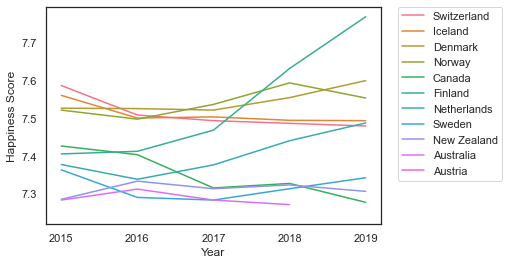

In [68]:
sns.set_theme(style='white')
sns.lineplot(x='Year',y='Happiness Score',hue='Country',data=Top10df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.color_palette('tab10')
plt.show()

In [19]:
GDP=GDPRawData[GDPRawData["Year"]>2014]
GDP

,Country Name,Country Code,Year,Value
47,Arab World,ARB,2015,2.563302e+12
48,Arab World,ARB,2016,2.504703e+12
104,Caribbean small states,CSS,2015,6.951622e+10
105,Caribbean small states,CSS,2016,6.670736e+10
131,Central Europe and the Baltics,CEB,2015,1.285573e+12
...,...,...,...,...
11392,"Yemen, Rep.",YEM,2016,2.731761e+10
11448,Zambia,ZMB,2015,2.115439e+10
11449,Zambia,ZMB,2016,2.106399e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [20]:
GDP['Year'].unique # only has year 2015 & 2016 GDP not useful dataset

<bound method Series.unique of 47       2015
48       2016
104      2015
105      2016
131      2015
         ... 
11392    2016
11448    2015
11449    2016
11505    2015
11506    2016
Name: Year, Length: 480, dtype: int64>

In [21]:
#df18=select_col(H18RawData)
# H18=df18.assign(Year='2018')
# H18

In [22]:
#pd.concat([d for df in [df15,df16,df17,df18]])
